# GENERAL: TO DELETE

Found some crazy resources which will make our life much easier

> 1. [kaggle EEG Muse (meh)](https://www.kaggle.com/birdy654/eeg-brainwave-dataset-mental-state)
> 1. [Crazy code that makes literally 1000 features for you](https://github.com/jordan-bird/eeg-feature-generation)
> 1. [Explanation of features and their importance ans science and shite](https://link.springer.com/chapter/10.1007/978-3-030-29933-0_37)

-Almu

# General

## Fix Random State

In [1]:
SEED = 55;

## Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow.keras as kr
import seaborn as sns
import os
#import scipy

# Importing the Raw Data

In [3]:
%%time


# Get Current Working directory and append the data relative dir
cwd = os.getcwd()
notTiredDir = cwd + r"\Data\Raw\NotTired"
tiredDir = cwd + r"\Data\Raw\Tired"

# Hold file locations
filesTired=[];
filesNotTired=[];

#Populate file location arrays
for file in os.listdir(notTiredDir):
    if file.endswith('.csv'):
        filesNotTired.append(os.path.join(notTiredDir, file))
for file in os.listdir(tiredDir):
        if file.endswith('.csv'):
            filesTired.append(os.path.join(tiredDir, file))
            
#Test reading files by changing num1
num1=6;
sample = pd.read_csv(filesNotTired[num1])
sample 

Wall time: 13 ms


,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_X,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements
0,2021-11-01 17:54:38.045,1.110457,-0.382196,0.082630,0.743808,0.455723,-0.523256,0.086015,0.487615,0.493558,...,4.134674,-5.824432,-1.510315,1.0,1.0,2.0,1.0,1.0,70.0,NaN
1,2021-11-01 17:54:39.045,0.904642,-0.382196,0.236881,0.613098,0.313527,-0.523256,0.171247,0.546970,0.538756,...,4.329071,-2.990723,-1.644897,1.0,1.0,2.0,1.0,1.0,70.0,NaN
2,2021-11-01 17:54:39.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/jaw_clench
3,2021-11-01 17:54:40.045,0.652124,-0.382196,0.462323,0.410327,0.293693,-0.523256,0.267178,0.466408,0.343593,...,5.622559,-5.099182,-0.732727,1.0,1.0,2.0,1.0,1.0,70.0,NaN
4,2021-11-01 17:54:41.043,0.558608,-0.382196,0.502156,0.877835,0.281408,-0.523256,0.337400,0.469669,0.381862,...,4.882355,-3.536530,-1.652374,1.0,1.0,2.0,1.0,1.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,2021-11-01 17:56:57.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,5.510406,-7.880554,-2.257996,1.0,1.0,4.0,2.0,1.0,70.0,NaN
157,2021-11-01 17:56:57.111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
158,2021-11-01 17:56:57.852,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/elements/blink
159,2021-11-01 17:56:58.042,1.011459,-0.382196,0.502156,0.955036,0.456557,-0.523256,0.337400,0.439388,0.575279,...,4.844971,-6.190796,-2.781372,1.0,1.0,4.0,4.0,1.0,70.0,NaN


In [4]:
#Mini-Summary of Block
print(f"> {len(filesNotTired)} files were added from the NOT TIRED category")
print(f"> {len(filesTired)} files were added from the TIRED category\n")

> 22 files were added from the NOT TIRED category
> 10 files were added from the TIRED category



## Available Features

In [5]:
pd.DataFrame(sample.columns)

,0
0,TimeStamp
1,Delta_TP9
2,Delta_AF7
3,Delta_AF8
4,Delta_TP10
5,Theta_TP9
6,Theta_AF7
7,Theta_AF8
8,Theta_TP10
9,Alpha_TP9


## Raw Data Structure

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TimeStamp        161 non-null    object 
 1   Delta_TP9        141 non-null    float64
 2   Delta_AF7        141 non-null    float64
 3   Delta_AF8        141 non-null    float64
 4   Delta_TP10       141 non-null    float64
 5   Theta_TP9        141 non-null    float64
 6   Theta_AF7        141 non-null    float64
 7   Theta_AF8        141 non-null    float64
 8   Theta_TP10       141 non-null    float64
 9   Alpha_TP9        141 non-null    float64
 10  Alpha_AF7        141 non-null    float64
 11  Alpha_AF8        141 non-null    float64
 12  Alpha_TP10       141 non-null    float64
 13  Beta_TP9         141 non-null    float64
 14  Beta_AF7         141 non-null    float64
 15  Beta_AF8         141 non-null    float64
 16  Beta_TP10        141 non-null    float64
 17  Gamma_TP9       

# Data Preprocessing

## Creating the RAW Dataset

In [7]:
%%time
## Extract rows 21-25 from all files as these are the only 5 relevent features

rowsTired=[];
for f in filesTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])
        
rowsNotTired=[];
for f in filesNotTired:
    for r in range(pd.read_csv(f).shape[0]):
        rowsNotTired.append(pd.read_csv(f).iloc[r,[0, 21,22,23,24,25]])



Wall time: 3min 4s


In [86]:
data_NT = pd.DataFrame(rowsNotTired);
original_NT = data_NT.copy();
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.816850
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857
4,2021-11-01 17:27:31.366,809.890110,780.476190,798.205128,743.406593,785.311355
...,...,...,...,...,...,...
1666,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179
1667,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883
1668,2021-11-02 22:14:36.024,776.849817,800.219780,793.369963,803.040293,482.307692
1669,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883


In [87]:
data_T = pd.DataFrame(rowsTired);
original_T = data_T.copy();
data_T

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT
0,2021-11-11 00:54:16.918,782.893773,767.985348,1100.805861,799.413919,732.930403
1,2021-11-11 00:54:17.318,NaN,NaN,NaN,NaN,NaN
2,2021-11-11 00:54:17.920,790.549451,887.655678,1648.791209,809.487179,734.139194
3,2021-11-11 00:54:18.686,NaN,NaN,NaN,NaN,NaN
4,2021-11-11 00:54:18.929,755.494505,0.000000,0.000000,732.124542,565.714286
...,...,...,...,...,...,...
452,2021-11-12 06:29:34.149,NaN,NaN,NaN,NaN,NaN
453,2021-11-12 06:29:34.364,845.347985,590.293040,1199.523810,852.197802,680.146520
454,2021-11-12 06:29:35.364,811.501832,514.542125,695.457875,851.794872,835.677656
455,2021-11-12 06:29:35.788,NaN,NaN,NaN,NaN,NaN


In [88]:
print(f"Not Tired Data size is: \t{data_NT.shape}", f"\nTired Data size is: \t\t{data_T.shape}")

Not Tired Data size is: 	(9685, 6) 
Tired Data size is: 		(10796, 6)


## Adding empty column 
Append an empty column in order to run the method.


In [89]:
#Conserve headers
headers = original_NT.columns.values.tolist()

#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
data_T = pd.DataFrame(np.hstack((data_T.to_numpy(),   np.zeros((data_T.shape[0], 1)) )))
data_NT= pd.DataFrame(np.hstack((data_NT.to_numpy(), np.zeros((data_NT.shape[0], 1)))))

In [90]:
#Reattach headers
data_T.columns =  np.hstack((headers, ['Empty']));
data_NT.columns = np.hstack((headers, ['Empty']));

#Check
data_NT

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,2021-11-01 17:27:27.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,2021-11-01 17:27:28.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,2021-11-01 17:27:29.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,2021-11-01 17:27:30.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,2021-11-01 17:27:31.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0
...,...,...,...,...,...,...,...
9680,2021-11-02 22:14:34.024,821.575092,778.058608,818.351648,836.080586,809.487179,0.0
9681,2021-11-02 22:14:35.026,773.626374,778.461538,813.113553,797.399267,712.783883,0.0
9682,2021-11-02 22:14:36.024,776.849817,800.21978,793.369963,803.040293,482.307692,0.0
9683,2021-11-02 22:14:37.024,812.307692,796.996337,788.937729,805.054945,712.783883,0.0


## Remove Empty Rows

In [91]:
data_T = data_T.dropna()

In [92]:
data_NT = data_NT.dropna()

## Convert Datetime Column to Timestamps

In [93]:
from datetime import datetime

ind = 0;
for time in data_T.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_T.iat[ind, 0] = (tmstmp);
    ind=ind+1;
    
ind = 0;
for time in data_NT.iloc[:, 0]:
    tmstmp = datetime.strptime(str(time), '%Y-%m-%d %H:%M:%S.%f').timestamp()
    data_NT.iat[ind, 0] = (tmstmp);
    ind=ind+1;



In [94]:
data_NT.head()

,TimeStamp,RAW_TP9,RAW_AF7,RAW_AF8,RAW_TP10,AUX_RIGHT,Empty
0,1635812847.362,792.967033,811.904762,769.194139,788.937729,680.549451,0.0
1,1635812848.362,751.465201,770.805861,780.879121,803.846154,799.81685,0.0
2,1635812849.362,747.435897,827.619048,793.369963,802.234432,906.190476,0.0
3,1635812850.371,838.901099,803.040293,803.443223,795.787546,817.142857,0.0
4,1635812851.366,809.89011,780.47619,798.205128,743.406593,785.311355,0.0


## Save RAW Data to File

In [95]:
savelocT = cwd + r"\Data\Preprocessed\Tired.csv"
savelocNT = cwd + r"\Data\Preprocessed\NotTired.csv"

if os.path.exists(savelocT):
    os.remove(savelocT)
    
if os.path.exists(savelocNT):
    os.remove(savelocNT)

data_T.to_csv(savelocT,  mode='w', index = False)
data_NT.to_csv(savelocNT,mode='w', index = False)


from eegFG import EEG_feature_extraction as FG

x, y = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=50, 
                                         period=10, 
                                         remove_redundant=True, 
                                         cols_to_ignore=None)

#state=data_NT.iloc[:,-1]

## EEG Feature Generation

In [96]:
from eegFG import EEG_feature_extraction as FG

Nsamp = 50;
Perio = 6;

xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.05,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xT.shape

C:\Users\Al\anaconda3\lib\site-packages\scipy\linalg\_matfuncs_inv_ssq.py:827: LogmExactlySingularWarning: The logm input matrix is exactly singular.
  warnings.warn(exact_singularity_msg, LogmExactlySingularWarning)


(119, 984)

In [97]:
Nsamp = 50;
Perio = 5;

xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                         nsamples=Nsamp, 
                                         period=Perio,
                                         #state=data_NT.iloc[:,-1],
                                         slide_percent=0.06,
                                         remove_redundant=False, 
                                         cols_to_ignore=None)
xNT.shape

(219, 984)

```python

%%time

from importlib import reload

flaggity=False

tmp_results=[]
thresh = 95;
for ns in range(50,256,1):
    if (flaggity==True):
        break;
    for p in range(3,8):
        
        try:
            reload(FG);
            xT, yT = FG.generate_feature_vectors_from_samples(file_path=savelocT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
            
            xNT, yNT = FG.generate_feature_vectors_from_samples(file_path=savelocNT,
                                 nsamples=ns, 
                                 period=p,
                                 #state=data_NT.iloc[:,-1],
                                 slide_percent=0.01,
                                 remove_redundant=False, 
                                 cols_to_ignore=None)
        
        except (UnboundLocalError):
            continue;
            
        
        if (xNT.shape[1] == xT.shape[1]):
            print('Cols match!', xT.shape, xNT.shape)
            if (xNT.shape[0] >= thresh and xT.shape[0] >= thresh):
                print('Thresh met.')
                tmp_results.append((ns,p,xNT.shape[0],xT.shape[0],xNT.shape[1]))
                flaggity=True;
                break;
                
                
tmp_results

```

In [98]:
X_NT = pd.DataFrame(xNT)
X_NT.columns = np.hstack((['TimeStamp'], yNT))
X_NT.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.0,219.000000,219.000000,219.000000,219.000000,...,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0,219.0
mean,779.105307,790.250350,793.258774,774.799042,826.072764,0.0,0.795194,-0.121172,0.069205,-2.103254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,13.221727,13.962959,10.783482,15.090785,48.215973,0.0,29.464956,27.057741,19.906972,39.864481,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,742.197802,753.641026,778.260073,731.721612,730.996337,0.0,-88.384188,-79.917043,-84.016933,-130.084391,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,773.142857,786.197802,785.391941,770.543956,795.304029,0.0,-20.452674,-10.171238,-8.063057,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,780.717949,793.531136,791.194139,776.608059,825.362637,0.0,0.764957,3.152271,1.392108,0.776751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,790.065934,797.560440,797.399267,784.102564,849.296703,0.0,18.143992,11.409339,11.061487,15.138016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,797.479853,813.838828,826.329670,816.578755,970.981685,0.0,81.924841,93.667981,65.789165,145.152860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
pd.DataFrame(X_NT)

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
0,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,788.131868,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,782.571429,798.688645,794.336996,789.582418,827.377289,0.0,3.583346,-14.421597,0.365225,-17.210459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
215,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
216,779.428571,795.223443,792.644689,746.791209,825.443223,0.0,18.562297,18.482367,1.528074,-69.931473,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,778.380952,794.095238,795.062271,745.098901,814.644689,0.0,10.739133,1.946408,1.280510,20.558404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
X_T = pd.DataFrame(xT)
X_T.columns = np.hstack((['TimeStamp'], yT))
X_T.describe()

,TimeStamp,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,...,freq_156_5,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.0,119.000000,119.000000,119.000000,119.000000,...,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02,1.190000e+02
mean,853.022850,742.893619,911.472025,844.334452,784.668021,0.0,1.439227,-0.123772,-0.581400,4.849069,...,5.439934e-18,8.313440e-19,1.012543e-18,9.806274e-19,7.549416e-19,1.107075e-18,7.246946e-19,9.032981e-19,8.943504e-19,7.033148e-19
std,118.126749,251.525994,217.512393,104.498981,33.160809,0.0,254.559496,381.727887,256.604333,246.614039,...,1.069026e-17,2.118224e-18,1.971696e-18,1.909547e-18,1.923554e-18,4.824729e-18,1.846486e-18,1.758966e-18,1.741543e-18,1.792012e-18
min,732.796093,350.818071,532.069597,664.499389,705.665446,0.0,-628.239954,-655.880639,-731.972815,-460.710955,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,765.869963,558.797314,777.084860,784.841270,770.570818,0.0,-34.380751,-320.332371,-73.953916,-43.008357,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,805.189255,626.153846,882.954823,803.308913,794.645910,0.0,-0.355619,88.870928,7.618361,-12.709321,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,934.731380,967.301587,950.042735,876.507937,810.024420,0.0,30.105383,252.124660,124.322869,29.953412,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1152.985348,1349.884005,1541.947497,1150.097680,823.656899,0.0,717.580021,901.701208,607.799946,898.762093,...,4.176465e-17,6.183121e-18,4.819705e-18,4.667786e-18,5.614878e-18,2.195698e-17,5.389916e-18,4.299699e-18,4.257108e-18,5.230904e-18


In [101]:
# Drop TimeStamp

X_T=X_T.iloc[:,1:];
X_NT=X_NT.iloc[:,1:];

In [102]:
#Stack ones or zeros for each class [0 = NotTired, 1 = Tired]
X_T = pd.DataFrame(np.hstack((X_T.to_numpy(),   np.ones((X_T.shape[0], 1)) )))
X_NT= pd.DataFrame(np.hstack((X_NT.to_numpy(), np.zeros((X_NT.shape[0], 1)))))

In [103]:
X_T.columns  = np.hstack((yT, ['Target']))
X_NT.columns = np.hstack((yNT, ['Target']))

In [104]:
print(X_T.shape[0], X_NT.shape[0])

if (X_T.shape[1] == X_NT.shape[1]):
    dataset = np.vstack((X_T, X_NT))
    dataset = pd.DataFrame(dataset)
    print('\n')
else:
    print('ATTENTION')


119 219




In [105]:
dataset.columns = np.hstack((yT, ['Target']))
dataset = dataset.sample(frac = 1).reset_index(drop=True)
dataset

,lag1_mean_0,lag1_mean_1,lag1_mean_2,lag1_mean_3,lag1_mean_4,lag1_mean_5,lag1_mean_d_h2h1_0,lag1_mean_d_h2h1_1,lag1_mean_d_h2h1_2,lag1_mean_d_h2h1_3,...,freq_167_5,freq_177_5,freq_188_5,freq_198_5,freq_208_5,freq_219_5,freq_229_5,freq_240_5,freq_250_5,Target
0,554.768010,907.869353,799.145299,815.732601,0.0,33.958958,590.617749,124.322869,45.518191,23.631301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,788.695971,781.362637,785.956044,767.018315,0.0,23.014315,-11.128733,-8.822569,15.138016,29.581615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,797.238095,784.989011,791.677656,907.479853,0.0,3.214474,5.948740,11.896183,-20.262123,-51.582589,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,890.879121,1127.735043,835.946276,718.626374,0.0,443.111144,-406.107037,-731.972815,314.076231,-218.204290,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,794.498168,784.505495,773.787546,834.630037,0.0,23.615453,9.467773,-4.286018,9.498287,-112.627805,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,803.443223,791.113553,785.311355,780.073260,0.0,3.992237,-3.645572,19.216840,8.705780,-109.253000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,798.769231,789.018315,786.842491,797.802198,0.0,55.860118,-1.775760,12.502775,-30.339521,-26.476268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
335,793.047619,781.120879,782.249084,740.021978,0.0,-19.972296,-8.415673,-4.275465,5.303643,117.523907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
336,1000.744811,949.639805,843.131868,775.708181,0.0,-20.552845,-77.926418,-19.201847,-42.326010,43.821995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Separating Input and Output

In [106]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting Dataset into the Training and Test Sets

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = SEED)

## Feature Scaling


In [108]:
from sklearn.preprocessing import StandardScaler
scX = StandardScaler();
scX.fit(X_train); #Fit to training data only
x = scX.transform(x)

In [109]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,973,974,975,976,977,978,979,980,981,982
0,-1.441650,0.524538,-0.041402,0.061263,0.0,0.218631,2.599133,0.786815,0.317553,0.186700,...,2.602095,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
1,0.100315,-0.356607,-0.213718,-0.931924,0.0,0.149068,-0.062213,-0.048084,0.114203,0.245360,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
2,0.156621,-0.331349,-0.138966,1.931808,0.0,0.023223,0.013316,0.081834,-0.122748,-0.554779,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
3,0.773868,2.055948,0.439400,-1.918540,0.0,2.819146,-1.809084,-4.582657,2.115151,-2.197381,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
4,0.138561,-0.334717,-0.372698,0.446545,0.0,0.152889,0.028879,-0.019638,0.076454,-1.156579,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,0.197523,-0.288690,-0.222141,-0.665760,0.0,0.028166,-0.029117,0.127739,0.071149,-1.123309,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
334,0.166714,-0.303284,-0.202137,-0.304302,0.0,0.357831,-0.020847,0.085638,-0.190201,-0.307274,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
335,0.128999,-0.358291,-0.262149,-1.482326,0.0,-0.124149,-0.050214,-0.019571,0.048377,1.112319,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908
336,1.498061,0.815478,0.533279,-0.754755,0.0,-0.127839,-0.357639,-0.113168,-0.270433,0.385745,...,-0.289122,-0.224908,-0.282843,-0.282843,-0.224908,-0.137361,-0.224908,-0.282843,-0.282843,-0.224908


# Principal Component Analysis
## Calculate Principal Components

In [110]:
from sklearn.decomposition import PCA

information = 225; #99.9/100;
PrinCom=PCA(n_components=information, random_state = SEED)
PrinCom.fit(X_train)

Z_train = PrinCom.transform(X_train);
Z_test = PrinCom.transform(X_test);

print('Train set shape = ',Z_train.shape, '\nTest set shape  = ',Z_test.shape)


Z=PrinCom.transform(x)
pd.DataFrame(Z).describe() #Data No longer Standard
print(f"Using the first {Z.shape[1]} Principal Components describes {np.round(PrinCom.explained_variance_ratio_.sum() * 100,5)}% of the data.")
pd.DataFrame(Z)

Train set shape =  (270, 225) 
Test set shape  =  (68, 225)
Using the first 225 Principal Components describes 100.0% of the data.


,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
0,-185257.355876,-22010.591341,9663.532107,3276.363283,-13403.684297,-24649.917511,3113.259085,-1096.607257,-3932.200979,3439.320039,...,-26.891673,-6.378546,42.817239,19.629954,30.946948,107.318413,33.566190,-49.912406,-35.080370,64.939042
1,-185259.303173,-22012.387968,9663.676542,3276.413787,-13404.739600,-24649.473796,3113.377822,-1096.325451,-3932.568682,3439.173979,...,-27.125620,-6.680254,43.500518,18.994572,30.436685,107.440777,33.097068,-49.352438,-34.510897,65.046639
2,-185259.285400,-22012.393660,9663.700936,3276.444275,-13404.788070,-24649.106439,3113.375209,-1096.522306,-3932.729888,3438.986010,...,-27.324038,-6.761638,42.836802,19.127943,30.925007,107.748931,33.004242,-49.483384,-34.499043,64.666388
3,-185241.320625,-22018.099526,9670.239601,3279.653552,-13404.820195,-24655.719858,3114.752967,-1101.915259,-3922.057794,3442.262321,...,-26.246333,-7.136159,42.244043,20.309134,30.690643,106.296086,32.978358,-49.354913,-36.105921,63.441298
4,-185259.351222,-22012.353141,9663.714588,3276.444451,-13404.621847,-24649.921203,3113.400587,-1096.255629,-3932.682123,3439.316474,...,-27.346709,-7.001396,43.625567,19.631723,30.652346,108.183491,32.937395,-49.694901,-34.850273,64.568449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,-185259.332399,-22012.331152,9663.772007,3276.483118,-13404.610678,-24649.856920,3113.417025,-1096.347120,-3932.636559,3439.399730,...,-27.591068,-6.791297,43.566120,19.415296,30.868735,108.173574,33.792851,-49.938637,-34.754797,65.044784
334,-185259.335867,-22012.327412,9663.737812,3276.474325,-13404.626653,-24649.909538,3113.383611,-1096.186269,-3932.610417,3439.332536,...,-27.484685,-6.840370,43.135900,19.391757,30.767519,107.754330,32.922665,-49.544160,-34.747571,65.291697
335,-185259.306334,-22012.381067,9663.675528,3276.438065,-13404.719732,-24649.457075,3113.357207,-1096.285340,-3932.689176,3439.078652,...,-26.987828,-6.370898,43.252194,19.497244,30.777094,107.608032,32.835614,-49.437070,-34.882774,65.633573
336,-185257.795190,-22011.370785,9663.358436,3276.272455,-13402.962237,-24649.669990,3113.472353,-1096.294097,-3931.255113,3439.852241,...,-27.178008,-7.169574,42.430159,19.360732,31.515985,108.146860,33.553393,-49.884767,-35.190333,64.550108


## Scaling the Principal Components

In [111]:
scZ = StandardScaler();
Z = scZ.fit_transform(Z)
pd.DataFrame(Z).describe()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
count,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,...,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02,3.380000e+02
mean,9.362385e-12,-9.625117e-12,1.395622e-12,-1.798781e-12,-1.385900e-11,2.257596e-12,-3.383217e-12,1.908565e-13,1.485066e-12,1.673655e-12,...,6.427395e-14,1.121448e-14,-1.877065e-14,1.566753e-14,1.492889e-13,2.419793e-13,-5.150625e-14,1.856618e-14,8.275629e-14,-6.884335e-14
std,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,...,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00,1.001483e+00
min,-4.321333e-01,-4.739154e+00,-2.212363e+00,-7.070766e-01,-4.146936e+00,-3.177324e+00,-8.485693e+00,-3.837221e+00,-2.796372e+00,-5.069729e+00,...,-2.221083e+00,-3.484848e+00,-3.635859e+00,-4.210065e+00,-2.347727e+00,-3.759995e+00,-2.309653e+00,-2.508324e+00,-3.727210e+00,-4.888770e+00
25%,-4.174179e-01,-1.291123e-02,-2.907561e-01,-2.758035e-01,-2.294550e-01,-2.386680e-01,-1.339211e-01,8.671993e-02,-3.412520e-01,-1.805925e-01,...,-7.547730e-01,-6.994060e-01,-6.013174e-01,-5.174225e-01,-6.999816e-01,-3.086881e-01,-7.480252e-01,-6.323926e-01,-5.764976e-01,-5.944110e-01
50%,-3.888614e-01,2.809324e-03,-2.526475e-01,-2.480379e-01,-1.079395e-01,-1.226544e-01,-2.958216e-02,2.445143e-01,-2.352205e-01,5.134195e-02,...,-6.063609e-02,2.524690e-05,1.285067e-01,6.084274e-03,2.921919e-03,1.577029e-01,-7.187930e-02,-3.707448e-03,1.218525e-01,2.392553e-03
75%,-9.848415e-02,1.632975e-01,-2.103396e-01,-1.876109e-01,2.577167e-01,1.006980e-01,2.488658e-02,3.048630e-01,-5.570030e-02,1.475136e-01,...,6.380536e-01,5.591921e-01,5.851291e-01,6.183697e-01,6.072130e-01,6.026544e-01,6.821958e-01,5.923666e-01,5.934951e-01,4.998159e-01
max,4.654281e+00,3.850430e+00,7.402041e+00,6.021507e+00,3.128367e+00,4.144571e+00,1.032248e+01,4.108728e+00,6.786388e+00,3.818781e+00,...,2.817274e+00,2.854058e+00,3.289443e+00,2.827925e+00,3.220698e+00,1.927686e+00,3.951212e+00,4.264681e+00,2.181648e+00,4.634065e+00


## Image Creation

In [112]:
## Scale all the PCA components on 0-256

def gen_images(data):
    images=[];
    for r in range(0,data.shape[0]): #Cycle over rows
        pixels=[];
        mini=min(data[r,:])
        maxi=max(data[r,:])
        m = (maxi-mini)/(256);

        for c in range(0,225): #Cycle over cols
            pixels.append(m * data[r,c] - mini);

        #once cols are done running
        img = np.reshape(pixels, (15,15)); #reshape into a square image
        images.append(img)
    return images;
    
all_images      = gen_images(Z)
x_train_img = gen_images(Z_train)
x_test_img  = gen_images(Z_test)

#Reshape into input shape for CNN models
x_train_img = np.array(x_train_img).reshape(270,15,15,1)
x_test_img  = np.array(x_test_img).reshape(68,15,15,1)

This image is for 1.0


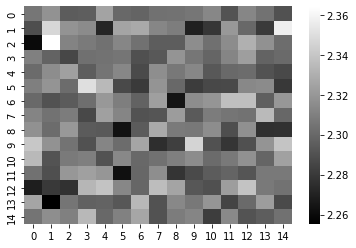

In [113]:
#first row of data
sns.heatmap(all_images[0], cmap='gray');
print(f'This image is for {y[0]}')

This image is for 0.0


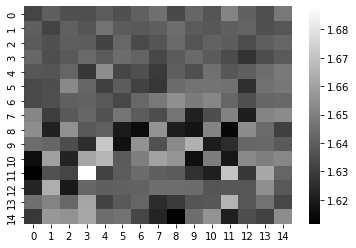

In [114]:
#nth row of data
n=112
sns.heatmap(all_images[n], cmap='gray');
print(f'This image is for {y[n]}')

# ML Models

## Definitions

In [115]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

#Callbacks
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

## Basic ANN Model

In [116]:
models = [];

In [117]:
def build_basicANN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    #Initializing ANN
    m= tf.keras.models.Sequential()
    
    #Add input layer
    m.add(tf.keras.layers.Dense(units=n, activation='relu'))
    
    #Add hidden layer
    m.add(tf.keras.layers.Dense(units=(n/2), activation='relu'))
    
    #Add output layer
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    #Compiling ANN
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #Return compiled, unfitted model
    return m;

In [118]:
%%time

#Build Model, Using defaults
## mANNBasic = build_basicANN() 
mANNBasic = (KerasClassifier(build_fn=build_basicANN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

#Training ANN
hist_ANNBasic = mANNBasic.fit(Z_train, y_train, batch_size = 100, epochs = 100, verbose=0)

models.append(('ANN Basic', mANNBasic))

Wall time: 820 ms


In [119]:
ANNpred.evaluate(x=Z_test, y=y_test, verbose=1)

3/3 [==============================] - 0s 0s/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

## Basic CNN Model

In [120]:
# Random-ish architecture

def build_basicCNN(optimizer='adam', epochs=100, batch_size=50, neurons=225):
    
    m = tf.keras.models.Sequential()
    m.add(tf.keras.layers.Conv2D(filters=neurons, kernel_size=3, activation='relu', input_shape=[15, 15, 1]))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Conv2D(filters=neurons/2, kernel_size=3, activation='relu'))
    m.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
    m.add(tf.keras.layers.Flatten())
    m.add(tf.keras.layers.Dense(units=neurons, activation='relu'))
    m.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

    return m;


In [122]:
%%time

#Build model using defaults
#mCNNBasic = build_basicCNN()
mCNNBasic = (KerasClassifier(build_fn=build_basicCNN, epochs=100, batch_size=50, optimizer='adam', verbose=0));

hist_CNNBasic = mCNNBasic.fit(x=x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Basic', mCNNBasic))

Restoring model weights from the end of the best epoch.
Epoch 00013: early stopping
Wall time: 2.48 s


In [ ]:
print(f'Accuracy of the unoptimized Basic CNN model = {round(mCNNBasic.evaluate(x=np.array(x_test_img).reshape(68,15,15,1), y=y_test, verbose=0)[1] * 100,3)}%')

## Advanced CNN Model

In [ ]:
def build_advancedCNN(optimizer='adam', epochs=100, batch_size=50, neurons=256):
    #params
    initFilt = neurons;
    initUnits= neurons;
    
    #model
    m = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=initFilt, kernel_size=3, activation='relu', input_shape=[15,15,1]),
        tf.keras.layers.Conv2D(filters=initFilt/2, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=initUnits),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    m.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return m;

In [ ]:
%%time

# build using defaults
mCNNAdvanced = build_advancedCNN()

#fit
hist_CNNAdvanced = mCNNAdvanced.fit(x_train_img,
                      y=y_train, 
                      batch_size = 50,
                      epochs = 100, 
                      verbose=0,
                      callbacks=es,
                      validation_data=(x_test_img, y_test))

models.append(('CNN Advanced', mCNNAdvanced))

In [ ]:
print(f'Accuracy of the unoptimized Advanced CNN model = {round(mCNNAdvanced.evaluate(x=np.array(x_test_img).reshape(68,15,15,1), y=y_test, verbose=0)[1] * 100,3)}%')

## Random Forest Model

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier
RFCmodel = RandomForestClassifier(n_estimators=100); #N_estimators and criterion can be optimized.
RFCmodel.fit(Z_train, y_train);
models.append(('RF', RFCmodel));

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(solver='newton-cg');
LRmodel.fit(Z_train, y_train);
models.append(('LR',LRmodel));

# Performance Comparison
## Via K-Fold Cross-Validation

In [ ]:
print(np.array(models).shape)
pd.DataFrame(models)

In [ ]:
# Number of splits to make.
## N = 3;
## 
## from sklearn import model_selection
## from sklearn.model_selection import StratifiedKFold
## 
## CV_results = [];
## scoring = 'accuracy';
## 
## import warnings
## warnings.filterwarnings('ignore')
## with warnings.catch_warnings():      #Catch warnings in code section
##     warnings.simplefilter("ignore")
##     for tp in models:
##         kfold = StratifiedKFold(n_splits=N, shuffle=True)
##         #kfold = model_selection.KFold(n_splits=N);
##         CVinternal_results = model_selection.cross_val_score(tp[1], x, y, cv=kfold, scoring=scoring);
##         CV_results.append((CVinternal_results));

In [ ]:
#reset data
#data_T = original_T.copy();
#data_NT = original_NT.copy();

#Reload FG
from importlib import reload
reload(FG)